In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [17]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:10]
y = data.iloc[:,-1]

In [18]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                               Specs         Score
9  percentage_of_time_with_abnormal_long_term_var...  17921.988734
7                    abnormal_short_term_variability   3270.412869
0                                     baseline value    180.585610
8               mean_value_of_short_term_variability    126.218030
2                                     fetal_movement      5.312255
1                                      accelerations      1.557398
6                           prolongued_decelerations      1.505833
4                                light_decelerations      0.584000
3                               uterine_contractions      0.342665
5                               severe_decelerations      0.055307


In [21]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [23]:
# memuat data
data = pd.read_csv("/content/fetal_health.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [24]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05040409 0.0656211  0.03036853 0.05439853 0.01489078 0.00302222
 0.07418296 0.11237037 0.06628751 0.13434311 0.03451566 0.03999346
 0.0353388  0.03122744 0.02430049 0.01080688 0.05920874 0.07230194
 0.05154407 0.03487336]


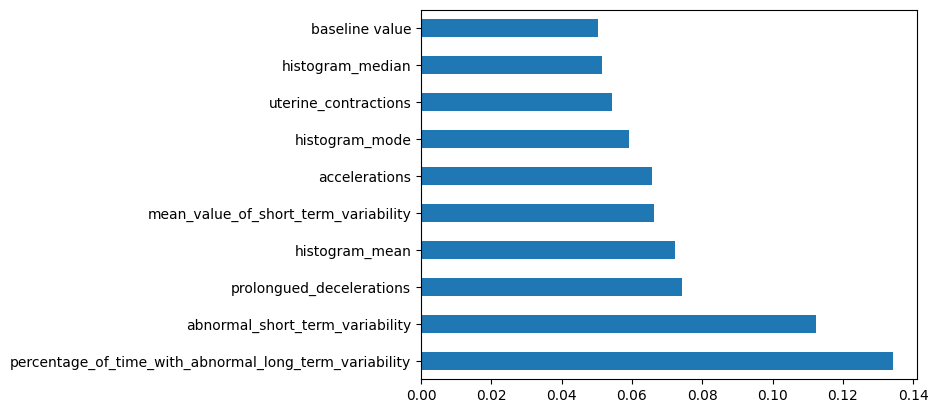

In [25]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [26]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
# memuat data
data = pd.read_csv("/content/fetal_health.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [29]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

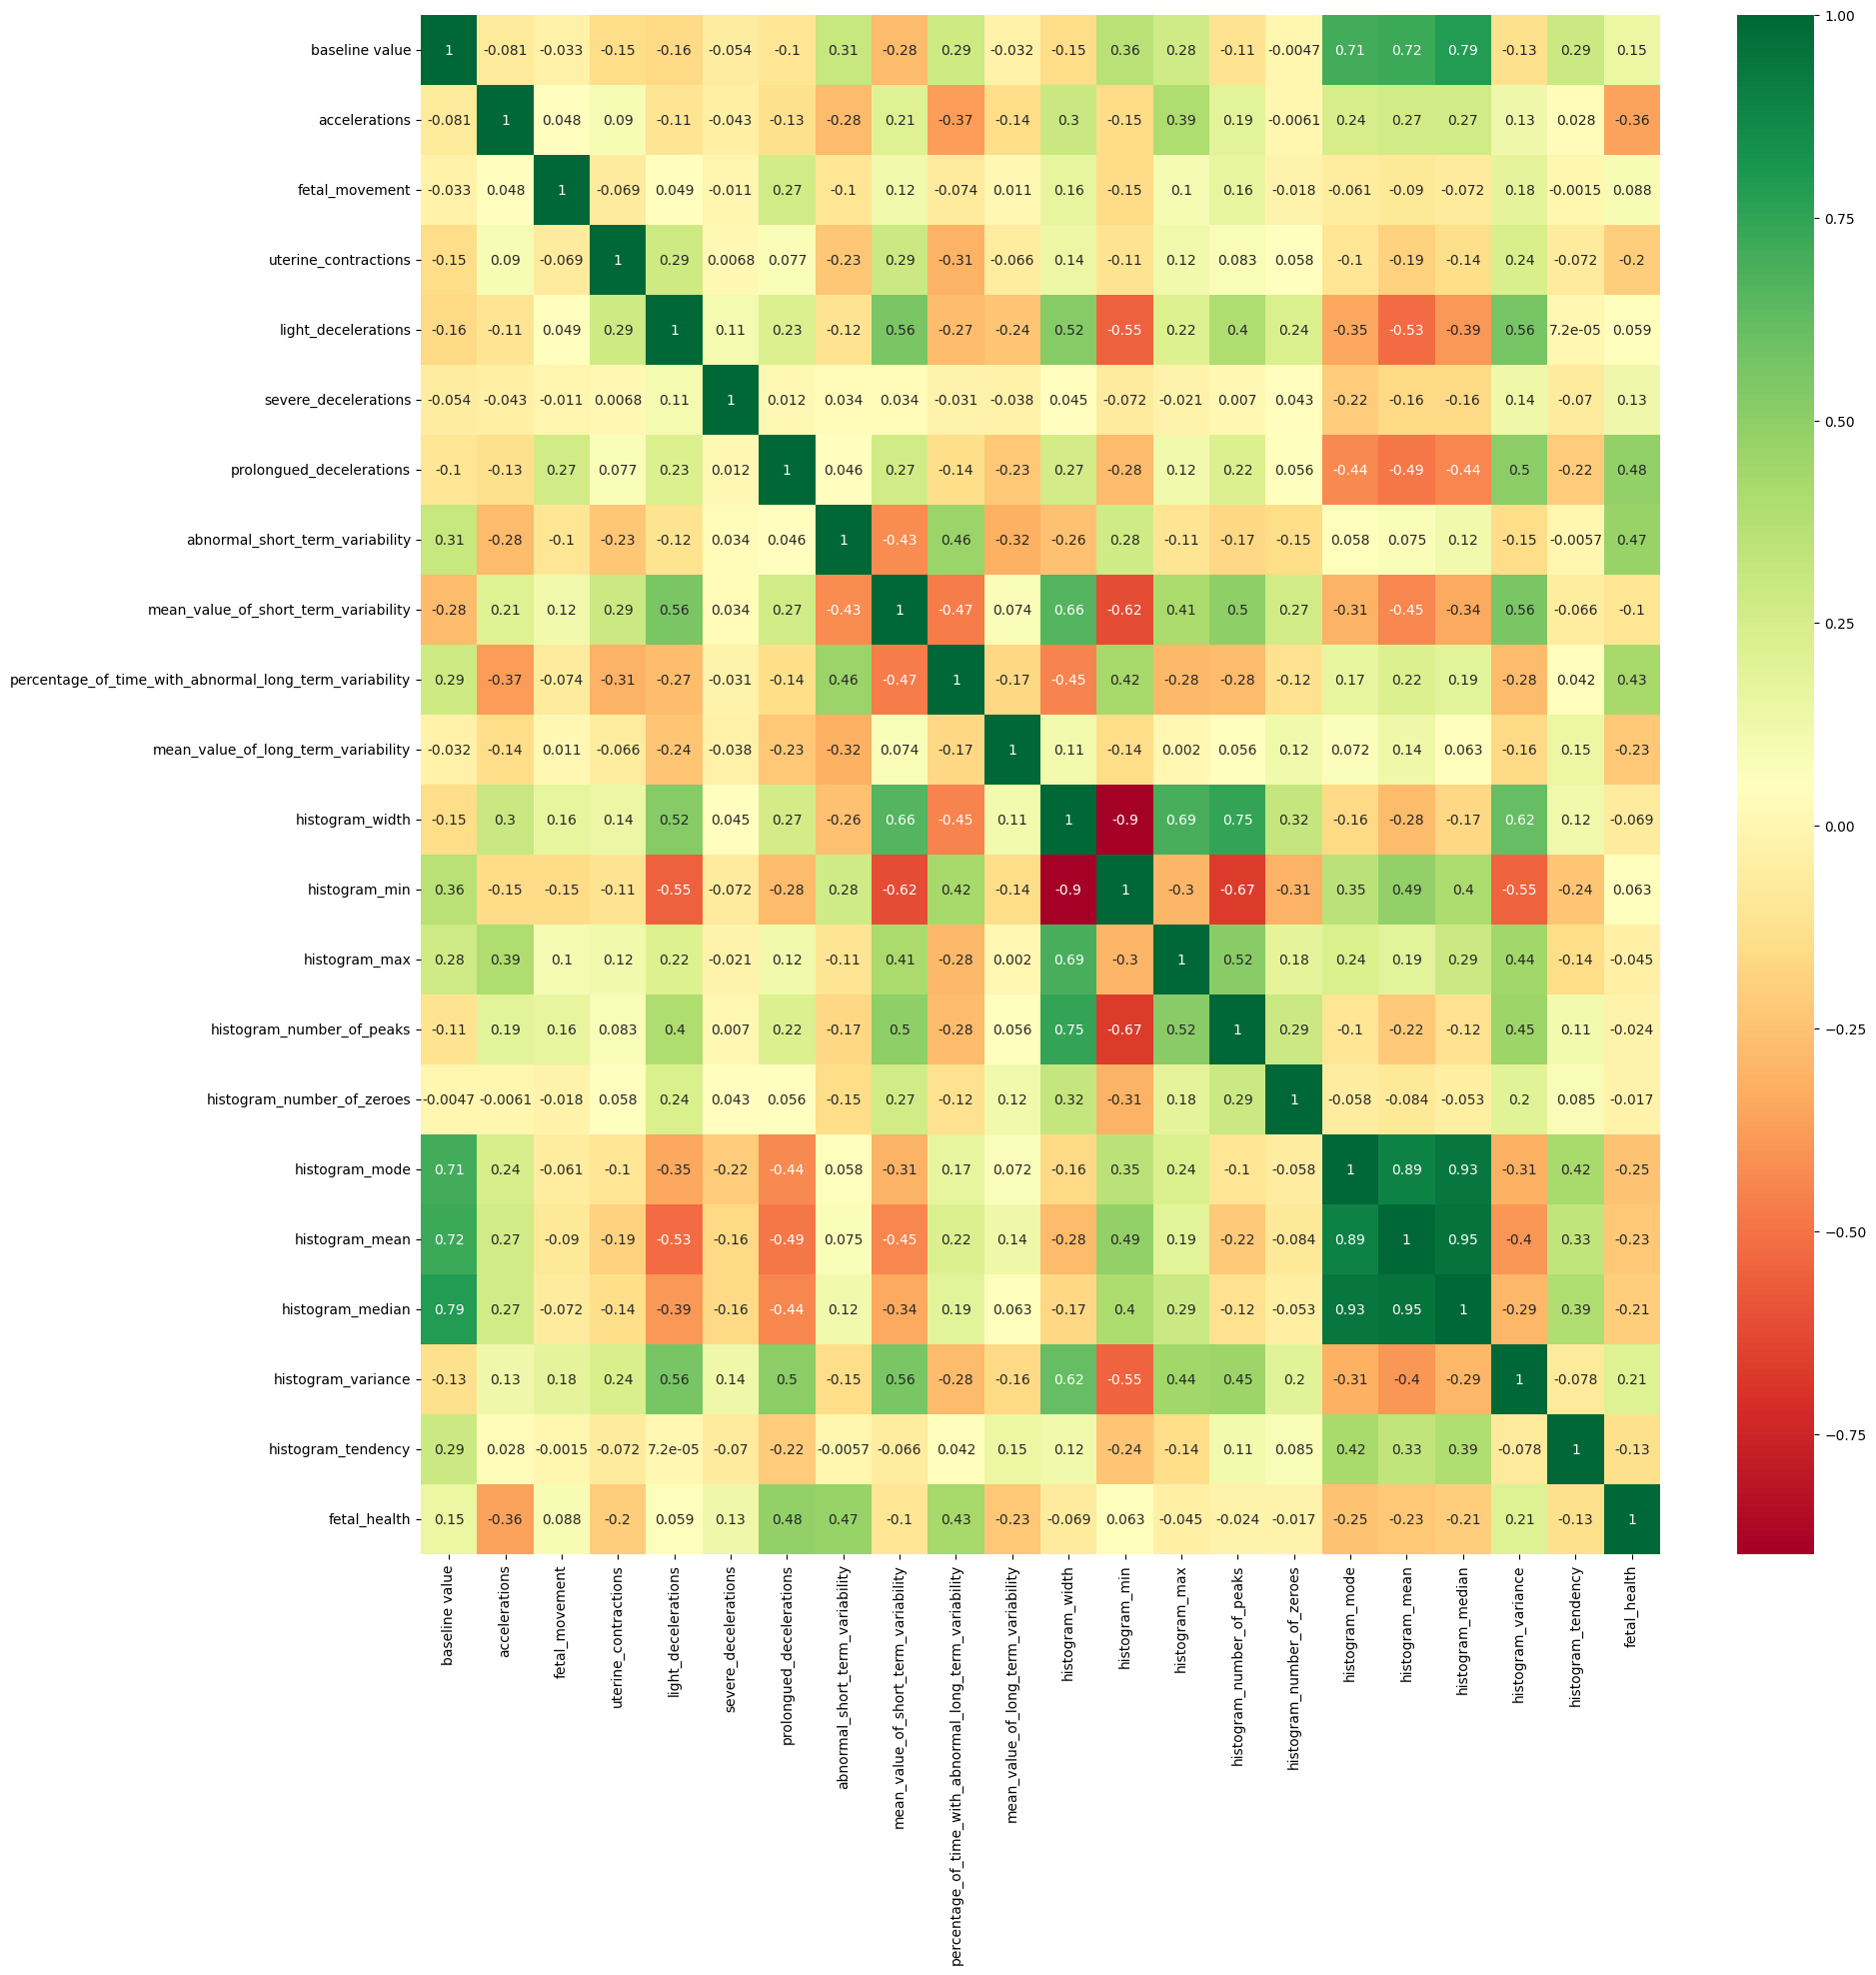

In [30]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

KESIMPULAN

*   Fethal health memiliki relasi yang kuat dengan variabel prolongued decelerations diikuti dengan abnormal short terms variability dan vintage of time with abnormal long term variability

em daftar
*   Dan memiliki relasi yang lemah dengan variabel accelerations, histrogram mode, mean value of long term variability, histogram mean, dan histogram median

